In [33]:
#import packages for data manuplation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import sys
import os

In [35]:
sys.path.append(os.path.abspath(os.path.join('Data')))

In [36]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv('../Data/clean_telecom_data_source.csv')
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),http_dl_(bytes),http_ul_(bytes),activity_duration_dl_(ms),activity_duration_ul_(ms),dur._(ms).1,handset_manufacturer,handset_type,nb_of_sec_with_125000b_<_vol_dl,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_dl_<_31250b,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.959783,17.633655,44.0,44.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,3330.0,37882.0,1.321510e+09,Samsung,Samsung Galaxy A8 (2018),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,0.0,0.0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   dur._(ms)                                 146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn/number                             146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

##### user’s engagement using sessions frequency metrics


In [38]:
engage_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [39]:
session_count = engage_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_frequency = session_count.sort_values(by=['bearer_id'], ascending = False)
session_frequency.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360313e+10,12
3.376041e+10,12


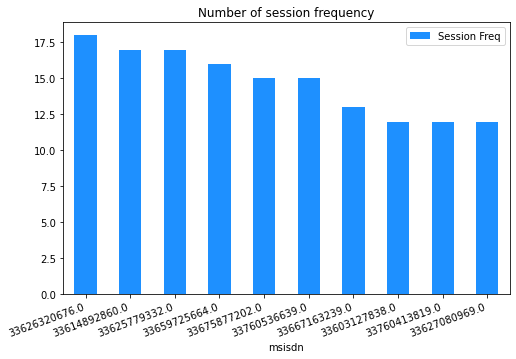

In [45]:
ax = session_frequency.rename(columns={'bearer_id': 'Session Freq'}).head(10).plot.bar(
    y=['Session Freq'],color='dodgerblue',
    title="Number of session frequency",
    figsize=(8,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()
